# Explorative Datenanalyse Reden der Bundesregierung

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read Data

In [3]:
df = pd.read_pickle('../data/reden-bundesregierung-preprocessed.p')

In [3]:
df.head(3).T

,0,1,2
person,Gerhard Schröder,Julian Nida-Rümelin,Gerhard Schröder
titel,Rede des Bundeskanzlers zur Eröffnung der 52. ...,Redebeitrag von Staatsminister Nida-Rümelin in...,Interview mit Bundeskanzler Schröder in 'Berli...
datum,2002-02-06 00:00:00,2002-02-01 00:00:00,2002-04-14 00:00:00
untertitel,"Man kann diese Filmfestspiele nicht eröffnen, ...","""Ich bin der Auffassung, wir müssen nicht nur ...",In dem Interview äußert sich Bundeskanzler Sch...
url,http://archiv.bundesregierung.de/bpaexport/red...,http://archiv.bundesregierung.de/bpaexport/red...,http://archiv.bundesregierung.de/bpaexport/red...
anrede,"Sehr geehrte Frau Nair, liebe Mitglieder der J...",Meine sehr geehrten Damen und Herren!,NaN
rohtext,"es ist angekündigt worden, man sollte im Beruf...","Frau Präsidentin! An Sie gerichtet, Herr Börn...",Frage (Peter Hahne): Bevor wir uns über den Au...
ort,None,None,None
tokens,"[es, ist, angekündigt, worden, man, sollte, im...","[Frau, Präsidentin, , An, Sie, gerichtet, Her...","[Frage, Peter, Hahne, Bevor, wir, uns, über, d..."
ntokens,1911,1319,1512


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   person      2983 non-null   object        
 1   titel       2982 non-null   object        
 2   datum       2983 non-null   datetime64[ns]
 3   untertitel  2088 non-null   object        
 4   url         2983 non-null   object        
 5   anrede      1447 non-null   object        
 6   rohtext     2983 non-null   object        
 7   ort         690 non-null    object        
 8   tokens      2983 non-null   object        
 9   ntokens     2983 non-null   int64         
 10  lemmata     2983 non-null   object        
 11  PER         2983 non-null   object        
 12  ORG         2983 non-null   object        
 13  LOC         2983 non-null   object        
 14  MISC        2983 non-null   object        
 15  NOUN        2983 non-null   object        
 16  VERB        2983 non-nul

In [5]:
df.columns

Index(['person', 'titel', 'datum', 'untertitel', 'url', 'anrede', 'rohtext',
       'ort', 'tokens', 'ntokens', 'lemmata', 'PER', 'ORG', 'LOC', 'MISC',
       'NOUN', 'VERB', 'ADJ'],
      dtype='object')

## Anzahl der Reden nach Jahren

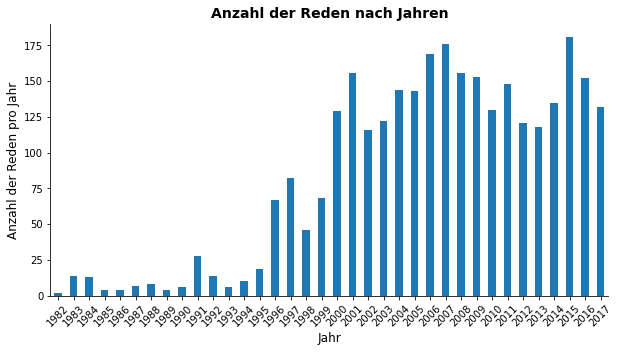

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
var = pd.crosstab(index=df.loc[:, 'datum'].dt.year, columns='count')
var.plot(kind='bar', legend=False, ax=ax)
ax.set_title(label='Anzahl der Reden nach Jahren',
             weight='semibold', size=14)                
ax.set_xlabel('Jahr', size=12)             
ax.set_ylabel('Anzahl der Reden pro Jahr',size=12)             
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('../img/Anzahl-Rede-Jahr.png', dpi=300, bbox_inches='tight');

## Anzahl der Reden nach Monaten

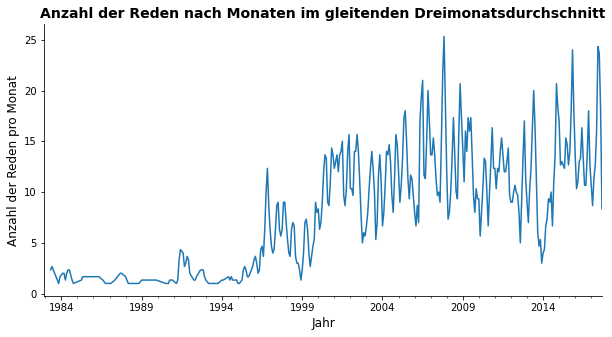

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
var_month = pd.crosstab(index=df.loc[:, 'datum'].dt.to_period('M'), columns='count')
var_month.rolling(window=3).mean().plot(legend=False, ax=ax)
ax.set_title(label='Anzahl der Reden nach Monaten im gleitenden Dreimonatsdurchschnitt',
             weight='semibold', size=14)                
ax.set_xlabel('Jahr', size=12)             
ax.set_ylabel('Anzahl der Reden pro Monat',size=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('../img/Anzahl-Reden-Monat.png', dpi=300, bbox_inches='tight');

## Verteilung der Länge der Reden

In [67]:
df.loc[:, 'ntokens'].describe(percentiles=[0.25, 0.5, 0.75, 0.95])

count     2983.000000
mean      1939.533691
std       1285.096751
min          6.000000
25%        963.500000
50%       1599.000000
75%       2605.000000
95%       4425.600000
max      10459.000000
Name: ntokens, dtype: float64

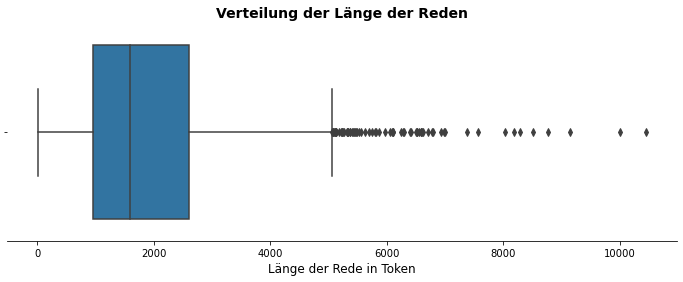

In [24]:
fig, ax = plt.subplots(figsize=(12,4))

sns.boxplot(x='ntokens', data=df, ax=ax)

ax.set_title(label='Verteilung der Länge der Reden', weight='semibold', size=14)
ax.set_xlabel('Länge der Rede in Token', size=12)
             

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False);

plt.savefig('../img/boxplot_redenlänge.png', dpi=300, bbox_inches='tight')

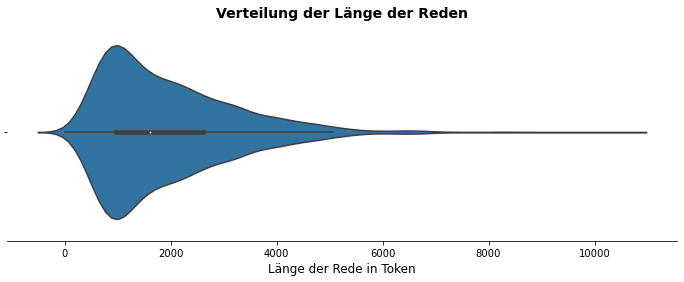

In [23]:
fig, ax = plt.subplots(figsize=(12,4))

sns.violinplot(x='ntokens', data=df, ax=ax)

ax.set_title(label='Verteilung der Länge der Reden', weight='semibold', size=14)
ax.set_xlabel('Länge der Rede in Token', size=12)
             

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False);

plt.savefig('../img/violinplot_redenlänge.png', dpi=300, bbox_inches='tight')

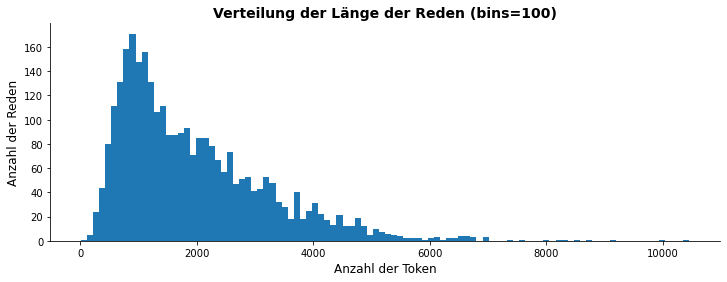

In [25]:
fig, ax = plt.subplots(figsize=(12,4))

df.loc[:, 'ntokens'].plot(kind='hist', bins=100, ax=ax)
                                 
ax.set_title(label='Verteilung der Länge der Reden (bins=100)',weight='semibold', size=14)
ax.set_xlabel('Anzahl der Token', size=12)
ax.set_ylabel('Anzahl der Reden', size=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('../img/histogramm_redenlänge.png', dpi=300, bbox_inches='tight');

### Längste und kürzeste Reden

In [65]:
df.loc[df.loc[:, 'ntokens'].idxmax(),:]

person                                                     Helmut Kohl
titel                Rede vor dem Deutschen Bundestag anlässlich de...
datum                                              1998-09-03 00:00:00
untertitel                                                         NaN
url                  https://www.helmut-kohl.de/index.php?menu_sel=...
anrede                                                             NaN
rohtext              Frau Präsidentin,\nmeine Damen und Herren,\nic...
ort                                                                NaN
tokens               [Frau, Präsidentin, \n, meine, Damen, und, Her...
ntokens                                                          10459
lemmata              [frau, präsidentin, dame, herr, gestehen, redn...
PER                  [Theo Waigel, Theo Waigel, Gerhard Schröder,, ...
ORG                  [Koalition, CDU/CSU, PDS, CDU/CSU., Wähler!, S...
LOC                  [Finanzminister, Rotgrün, Startbahn West, Koso...
MISC  

In [66]:
df.loc[df.loc[:, 'ntokens'].idxmin(),:]

person                                                    Michael Glos
titel                Anforderungen an ein zukunftsfähiges Energiepr...
datum                                              2006-01-17 00:00:00
untertitel           Michael Glos, Bundesminister für Wirtschaft un...
url                  http://www.bundesregierung.de/nn_914560/Conten...
anrede                                                             NaN
rohtext                                        >> Die Rede im Wortlaut
ort                                                               None
tokens                                 [>, >, Die, Rede, im, Wortlaut]
ntokens                                                              6
lemmata                                          [der, rede, wortlaut]
PER                                                                 []
ORG                                                                 []
LOC                                                                 []
MISC  

## Aussagen zu den Redner:innen

In [29]:
# Anzahl der Personen

print('Anzahl der Redner:innen')
print(df.loc[:, 'person'].nunique())

Anzahl der Redner:innen
46


In [30]:
# Namen der Redner:innen

df.loc[:, 'person'].unique()

array(['Gerhard Schröder', 'Julian Nida-Rümelin', 'Christina Weiss',
       'Frank-Walter Steinmeier', 'Michael Naumann', 'Hans Martin Bury',
       'Otto Graf Lambsdorff', 'Peter Struck', 'Joschka Fischer',
       'Rolf Schwanitz', 'Waldemar Ritter', 'Edelgard Bulmahn',
       'Jürgen Trittin', 'k.A.', 'Friedrich Merz', 'Rudolf Scharping',
       'Renate Schmidt', 'Brigitte Zypries', 'Christine Bergmann',
       'Brigitte Sauzay', 'Heidemarie Wieczorek-Zeul',
       'Matthias Platzeck', 'Béla Anda', 'Werner Müller',
       'Herta Däubler-Gmelin', 'Angela Merkel', 'Bernd Neumann',
       'Ursula von der Leyen', 'Thomas de Maizière', 'Peer Steinbrück',
       'Michael Glos', 'Maria Böhmer', 'Franz Müntefering',
       'Wolfgang Schäuble', 'Franz Josef Jung', 'Sigmar Gabriel',
       'Hans Bernhard Beus', 'Hildegard Müller', 'Hermann Gröhe',
       'Ronald Pofalla', 'Joachim Gauck', 'Roman Herzog', 'Ilse Aigner',
       'Monika Grütters', 'Aydan Özoğuz', 'Helmut Kohl'], dtype=object)

In [31]:
person_counts = pd.crosstab(index=df.loc[:, 'person'], columns='count')

In [32]:
person_counts.sort_values(by='count', ascending=False).head(10)

col_0,count
person,
Angela Merkel,1128
Gerhard Schröder,417
Helmut Kohl,332
Bernd Neumann,323
Monika Grütters,246
Christina Weiss,204
Michael Naumann,64
Julian Nida-Rümelin,48
Thomas de Maizière,45


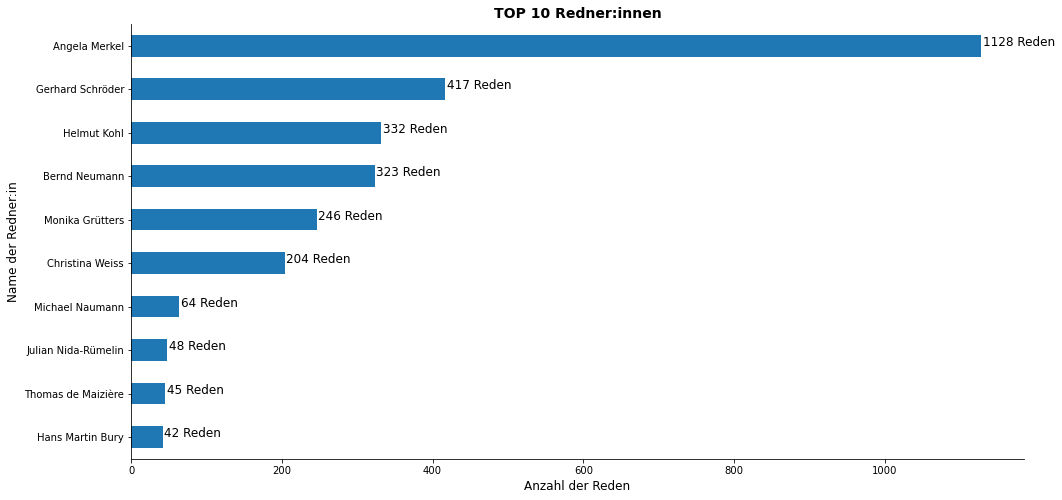

In [44]:
fig, ax = plt.subplots(figsize=(16,8))

person_counts = person_counts.sort_values(by='count', ascending=False).head(10)
person_counts.plot(kind='barh', ax=ax, legend=None)

ax.invert_yaxis() 

ax.set_title(label='TOP 10 Redner:innen', weight='semibold', size=14)
ax.set_xlabel('Anzahl der Reden', size=12)
ax.set_ylabel('Name der Redner:in', size=12)

for idx in range(len(person_counts.index)):
        ax.text(s=f'{int(person_counts.iloc[idx])} Reden',
                x=person_counts.iloc[idx] + 2,
                y=idx, size=12,
                color='black'
               )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('../img/TOP10-Redner.png', dpi=300, bbox_inches='tight');

In [33]:
person_counts.sort_values(by='count', ascending=False).tail(10)

col_0,count
person,
Aydan Özoğuz,1
Renate Schmidt,1
Peter Struck,1
Herta Däubler-Gmelin,1
Hans Bernhard Beus,1
Brigitte Zypries,1
Béla Anda,1
Friedrich Merz,1
Matthias Platzeck,1


## Auswertung der TOP-Rednerin

In [45]:
df_merkel = df[df.loc[:, 'person'] == 'Angela Merkel']

In [46]:
df_merkel.shape

(1128, 18)

In [47]:
df_merkel_years = pd.crosstab(index=df_merkel.loc[:, 'datum'].dt.year, columns='count')

In [48]:
df_merkel_years

col_0,count
datum,
2005,4
2006,100
2007,122
2008,101
2009,97
2010,90
2011,96
2012,82
2013,82


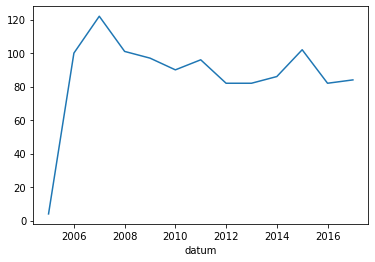

In [57]:
df_merkel_years.plot(legend=False);

### Verwendung von 'digital' in den Reden von Angela Merkel

In [50]:
df_merkel_digital = df_merkel[df_merkel.loc[:,'rohtext'].str.contains('[D]igital')]

In [51]:
df_merkel_digital_years = pd.crosstab(index=df_merkel_digital.loc[:, 'datum'].dt.year, columns='count')

In [52]:
df_merkel_digital_years 

col_0,count
datum,
2006,2
2007,5
2008,3
2009,3
2010,4
2011,3
2012,1
2013,8
2014,28


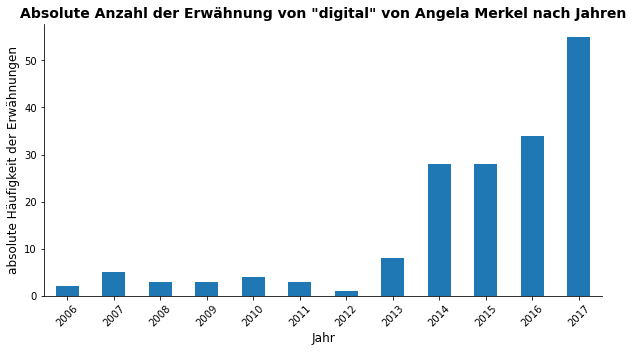

In [53]:
fig, ax = plt.subplots(figsize=(10,5))

df_merkel_digital_years.plot(kind='bar', legend=False, ax=ax)

ax.set_title(label='Absolute Anzahl der Erwähnung von "digital" von Angela Merkel nach Jahren',
             weight='semibold', size=14)                
ax.set_xlabel('Jahr', size=12)             
ax.set_ylabel('absolute Häufigkeit der Erwähnungen',size=12)             
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('../img/Anzahl-Erwähnungen-digital-Jahr.png', dpi=300, bbox_inches='tight');

In [54]:
df_merkel_digital_month = pd.crosstab(index=df_merkel_digital.loc[:, 'datum'].dt.to_period('M'), columns='count')

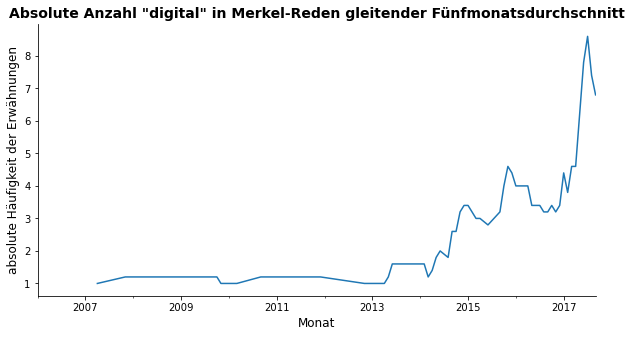

In [55]:
fig, ax = plt.subplots(figsize=(10,5))

df_merkel_rolling = df_merkel_digital_month.rolling(window=5).mean().plot(kind='line', legend=False, ax=ax)

ax.set_title(label='Absolute Anzahl "digital" in Merkel-Reden gleitender Fünfmonatsdurchschnitt',
             weight='semibold', size=14)                
ax.set_xlabel('Monat', size=12)             
ax.set_ylabel('absolute Häufigkeit der Erwähnungen',size=12)             
# ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('../img/Anzahl-Erwähnungen-digital-Monat-Rolling.png', dpi=300, bbox_inches='tight');

## Lexical Diversity

In [59]:
def lexical_diversity(tokens):
    '''Functions calculates lexical diversity'''
   
    return len(set(tokens)) / len(tokens)

In [60]:
df.loc[:, 'lexical_diversity'] = df.loc[:,'tokens'].apply(lambda tokens: lexical_diversity(tokens))

In [61]:
df.loc[:, 'lexical_diversity'].describe()

count    2983.000000
mean        0.452796
std         0.087142
min         0.229778
25%         0.384442
50%         0.452082
75%         0.518497
max         0.833333
Name: lexical_diversity, dtype: float64

In [62]:
df_ld = df.groupby('person')['lexical_diversity'].mean()

In [64]:
df_ld.sort_values(ascending=False)

person
Michael Glos                 0.833333
Waldemar Ritter              0.549517
Christina Weiss              0.538910
Bernd Neumann                0.532752
Monika Grütters              0.512733
Rolf Schwanitz               0.508521
Hans Martin Bury             0.506063
Sigmar Gabriel               0.497537
Renate Schmidt               0.490708
Hildegard Müller             0.487794
Ronald Pofalla               0.484907
Michael Naumann              0.483612
k.A.                         0.481195
Otto Graf Lambsdorff         0.480898
Frank-Walter Steinmeier      0.476316
Thomas de Maizière           0.475534
Christine Bergmann           0.473221
Peter Struck                 0.472837
Joschka Fischer              0.471557
Julian Nida-Rümelin          0.470823
Ursula von der Leyen         0.466951
Brigitte Zypries             0.463893
Franz Josef Jung             0.462174
Joachim Gauck                0.460709
Jürgen Trittin               0.459713
Rudolf Scharping             0.458715
Matth